# Bubble sort not optimized time complexity histograms for permutations of $n$ different elements 

## Best case - increasingly orted array ($\frac{n^2-n}{2}$ comparisons + $0$ swaps) - $T(n) = \frac{n^2-n}{2} = \Theta(n^2) $

## Worst case - de creasingly sorted array ($\frac{n^2-n}{2}$ comparisons + $\frac{n^2-n}{2}$  swaps) - $T(n) = n^2-n = \Theta(n^2) $

## Average case - expected number of comparisons + swaps on random unifrom permutation of $n$ different elements $T(n) = \frac{3}{4}(n^2-n)= \Theta(n^2) $



In [3]:
from itertools import permutations
 
n = 3
perm = permutations(range(1,n+1))

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    print(i)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


In [4]:
def bubbleSort(arr):
    steps = 0
    n = len(arr)
 
    # Traverse through all array elements
    for i in range(n):
 
        # Last i elements are already in place
        for j in range(0, n-i-1):
 
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            steps +=1
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
                steps +=1
    return(steps)
 


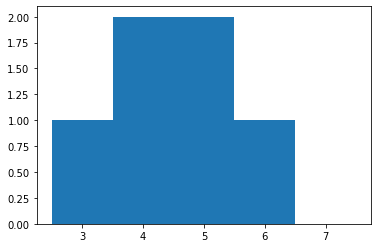

n= 3 experimental min= 3  theoretical min= (n-1)n/2 = 3.0  experimental max= 6  theoretical max = (n-1)n = 6  experimental average= 4.5  theoretical average = (3/4)*(n**2-n)= 4.5  std= 0.9574271077563381


In [48]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
n = 3
perm = permutations(range(1,n+1))

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))

b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)*(n**2-n)=",(3/4)*(n**2-n), " std=",np.std(ls))

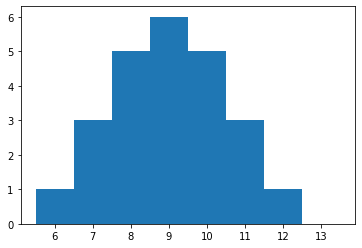

n= 4 experimental min= 6  theoretical min= (n-1)n/2 = 6.0  experimental max= 12  theoretical max = (n-1)n = 12  experimental average= 9.0  theoretical average = (3/4)*(n**2-n)= 9.0  std= 1.4719601443879744


In [49]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
n = 4
perm = permutations(range(1,n+1))

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))

b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)*(n**2-n)=",(3/4)*(n**2-n), " std=",np.std(ls))

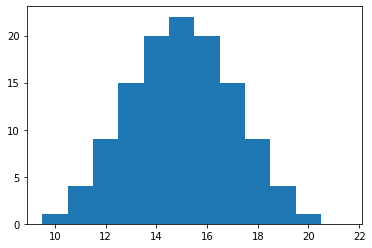

n= 5 experimental min= 10  theoretical min= (n-1)n/2 = 10.0  experimental max= 20  theoretical max = (n-1)n = 20  experimental average= 15.0  theoretical average = (3/4)*(n**2-n)= 15.0  std= 2.041241452319315


In [50]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
n = 5
perm = permutations(range(1,n+1))

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))

b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)*(n**2-n)=",(3/4)*(n**2-n), " std=",np.std(ls))

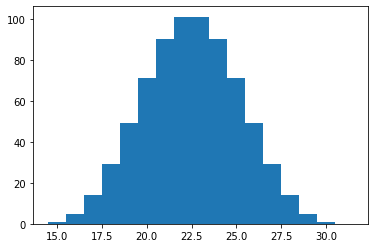

n= 6 experimental min= 15  theoretical min= (n-1)n/2 = 15.0  experimental max= 30  theoretical max = (n-1)n = 30  experimental average= 22.5  theoretical average = (3/4)*(n**2-n)= 22.5  std= 2.661453237111885


In [51]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
n = 6
perm = permutations(range(1,n+1))

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))

b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)*(n**2-n)=",(3/4)*(n**2-n), " std=",np.std(ls))

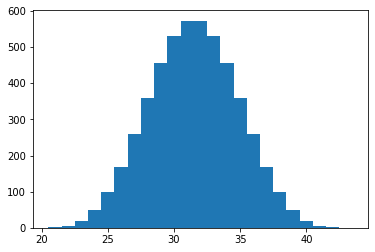

n= 7 experimental min= 21  theoretical min= (n-1)n/2 = 21.0  experimental max= 42  theoretical max = (n-1)n = 42  experimental average= 31.5  theoretical average = (3/4)*(n**2-n)= 31.5  std= 3.3291640592396967


In [52]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
n = 7
perm = permutations(range(1,n+1))

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))
  
b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)*(n**2-n)=",(3/4)*(n**2-n), " std=",np.std(ls))

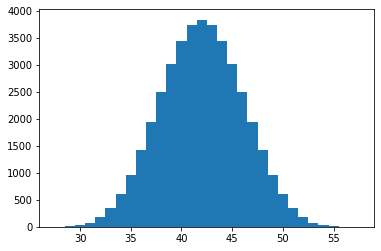

n= 8 experimental min= 28  theoretical min= (n-1)n/2 = 28.0  experimental max= 56  theoretical max = (n-1)n = 56  experimental average= 42.0  theoretical average = (3/4)*(n**2-n)= 42.0  std= 4.041451884327381


In [53]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
n = 8
perm = permutations(range(1,n+1))

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))
  
b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)*(n**2-n)=",(3/4)*(n**2-n), " std=",np.std(ls))

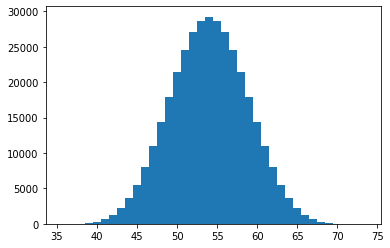

n= 9 experimental min= 36  theoretical min= (n-1)n/2 = 36.0  experimental max= 72  theoretical max = (n-1)n = 72  experimental average= 54.0  theoretical average = (3/4)*(n**2-n)= 54.0  std= 4.795831523312719


In [54]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
n = 9
perm = permutations(range(1,n+1))

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))
  
b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)*(n**2-n)=",(3/4)*(n**2-n), " std=",np.std(ls))

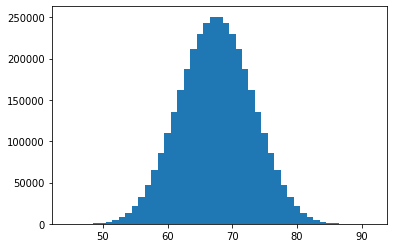

n= 10 experimental min= 45  theoretical min= (n-1)n/2 = 45.0  experimental max= 90  theoretical max = (n-1)n = 90  experimental average= 67.5  theoretical average = (3/4)*(n**2-n)= 67.5  std= 5.5901699437494745


In [55]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
n = 10
perm = permutations(range(1,n+1))

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))
  
b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)*(n**2-n)=",(3/4)*(n**2-n), " std=",np.std(ls))

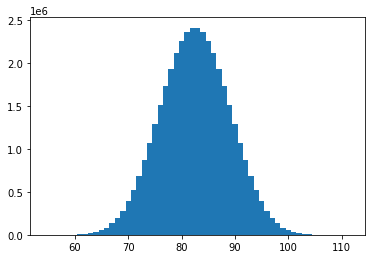

n= 11 experimental min= 55  theoretical min= (n-1)n/2 = 55.0  experimental max= 110  theoretical max = (n-1)n = 110  experimental average= 82.5  theoretical average = (3/4)*(n**2-n)= 82.5  std= 6.422616289332565


In [56]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
n = 11
perm = permutations(range(1,n+1))

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))
  
b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)*(n**2-n)=",(3/4)*(n**2-n), " std=",np.std(ls))


# Average case - expected number of comparisons + swaps on random unifrom permtation of $n$ diffrent elementns $T(n) = \frac{3}{4}(n^2-n)= \Theta(n^2) $

In [38]:
# Average case on random unifrom permtation of  n 3/4 (**2 -n)
import numpy as np 
import pandas as pd
import scipy.linalg as la

n = np.array([3.0,4.0,5.0,6.0])    # Number n of sorted elments 
t = np.array([4.5,9.0, 15.0,22.5]) # Average comparisons + swaps for the corresponding n 

data = pd.DataFrame({'n': n, 't': t})
data



,n,t
0,3.0,4.5
1,4.0,9.0
2,5.0,15.0
3,6.0,22.5


In [39]:
# Interpolating a polynomial of degree 3

X = np.column_stack([n**0,n**1,n**2,n**3])
a = la.solve(X,t)
a

array([ 0.  , -0.75,  0.75,  0.  ])

# Bubble sort not optimized time complexity histograms for permutations of $n$  elements with repetitions

## Best case - increasingly orted array ($\frac{n^2-n}{2}$ comparisons + $0$ swaps) - $T(n) = \frac{n^2-n}{2} = \Theta(n^2) $

## Worst case - de creasingly sorted array ($\frac{n^2-n}{2}$ comparisons + $\frac{n^2-n}{2}$  swaps) - $T(n) = n^2-n = \Theta(n^2) $

## Average case - expected number of comparisons + swaps on random unifrom permutation of $n$ different elements $T(n) = \frac{3}{4}n^2 - n +\frac{1}{4}= \Theta(n^2) $

In [73]:
from itertools import product

n=3 
perm = product(range(1,n+1), repeat = n)

c=0
for i in perm:
    print(i)
    c+=1

print(c)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(1, 3, 1)
(1, 3, 2)
(1, 3, 3)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(2, 3, 1)
(2, 3, 2)
(2, 3, 3)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 3, 1)
(3, 3, 2)
(3, 3, 3)
27


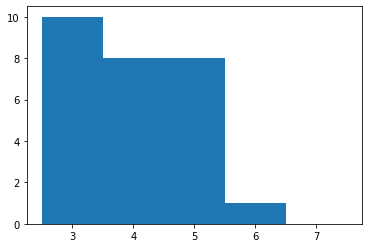

n= 3 experimental min= 3  theoretical min= (n-1)n/2 = 3.0  experimental max= 6  theoretical max = (n-1)n = 6  experimental average= 4.0  theoretical average = (3/4)(n**2)-n+(1/4)= 4.0  std= 0.90267093384844


In [83]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 
n = 3
perm = product(range(1,n+1), repeat = n)

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))

b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)(n**2)-n+(1/4)=",(3/4)*(n**2)-n+(1/4), " std=",np.std(ls))

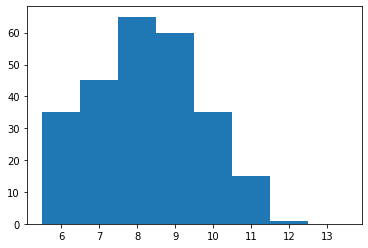

n= 4 experimental min= 6  theoretical min= (n-1)n/2 = 6.0  experimental max= 12  theoretical max = (n-1)n = 12  experimental average= 8.25  theoretical average = (3/4)(n**2)-n+(1/4)= 8.25  std= 1.4252192813739224


In [84]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 
n = 4
perm = product(range(1,n+1), repeat = n)

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))

b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)(n**2)-n+(1/4)=",(3/4)*(n**2)-n+(1/4), " std=",np.std(ls))

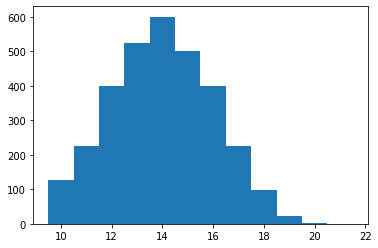

n= 5 experimental min= 10  theoretical min= (n-1)n/2 = 10.0  experimental max= 20  theoretical max = (n-1)n = 20  experimental average= 14.0  theoretical average = (3/4)(n**2)-n+(1/4)= 14.0  std= 2.0


In [85]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 
n = 5
perm = product(range(1,n+1), repeat = n)

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))

b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)(n**2)-n+(1/4)=",(3/4)*(n**2)-n+(1/4), " std=",np.std(ls))

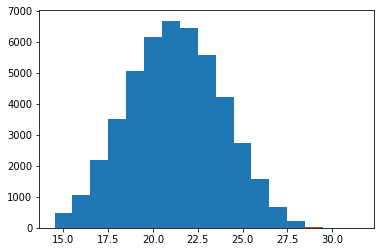

n= 6 experimental min= 15  theoretical min= (n-1)n/2 = 15.0  experimental max= 30  theoretical max = (n-1)n = 30  experimental average= 21.25  theoretical average = (3/4)(n**2)-n+(1/4)= 21.25  std= 2.624228281623776


In [86]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 
n = 6
perm = product(range(1,n+1), repeat = n)

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))

b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)(n**2)-n+(1/4)=",(3/4)*(n**2)-n+(1/4), " std=",np.std(ls))

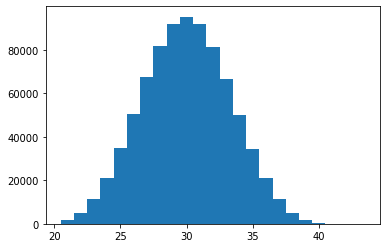

n= 7 experimental min= 21  theoretical min= (n-1)n/2 = 21.0  experimental max= 42  theoretical max = (n-1)n = 42  experimental average= 30.0  theoretical average = (3/4)(n**2)-n+(1/4)= 30.0  std= 3.295017884191656


In [87]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 
n = 7
perm = product(range(1,n+1), repeat = n)

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))

b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)(n**2)-n+(1/4)=",(3/4)*(n**2)-n+(1/4), " std=",np.std(ls))

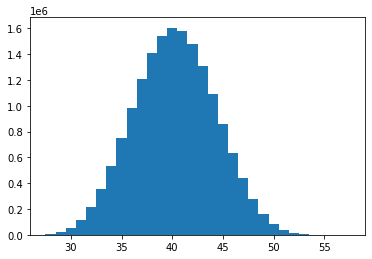

n= 8 experimental min= 28  theoretical min= (n-1)n/2 = 28.0  experimental max= 56  theoretical max = (n-1)n = 56  experimental average= 40.25  theoretical average = (3/4)(n**2)-n+(1/4)= 40.25  std= 4.00975373308636


In [88]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 
n = 8
perm = product(range(1,n+1), repeat = n)

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    ls.append(bubbleSort(i))

b = np.array(range(min(ls)-1,max(ls)+2) ) +0.5
plt.hist(ls,bins=b)
plt.show() 
print("n=", n, "experimental min=", min(ls)," theoretical min= (n-1)n/2 =", (n-1)*n/2," experimental max=", max(ls)," theoretical max = (n-1)n =",(n-1)*n, " experimental average=",np.average(ls)," theoretical average = (3/4)(n**2)-n+(1/4)=",(3/4)*(n**2)-n+(1/4), " std=",np.std(ls))

# Average case - expected number of comparisons + swaps on random unifrom permtation of $n$   elements with repetitions $T(n) = \frac{3}{4}n^2 - n +\frac{1}{4}= \Theta(n^2) $

In [81]:
# Average case on random unifrom permtation of  n 3/4 (**2 -n)
import numpy as np 
import pandas as pd
import scipy.linalg as la

n = np.array([3.0,4.0,5.0,6.0])    # Number n of sorted elments 
t = np.array([4.0 ,8.25,14.0,21.25]) # Average comparisons + swaps for the corresponding n 

data = pd.DataFrame({'n': n, 't': t})
data


,n,t
0,3.0,4.00
1,4.0,8.25
2,5.0,14.00
3,6.0,21.25


In [82]:
# Interpolating a polynomial of degree 3

X = np.column_stack([n**0,n**1,n**2,n**3])
a = la.solve(X,t)
a

array([ 0.25, -1.  ,  0.75,  0.  ])